In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# input data
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
# Output data
y=df['Exited']

In [8]:
x.shape

(10000, 8)

In [9]:
y.shape

(10000,)

In [10]:
x.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [11]:
df['Balance']=df['Balance'].astype(int)

In [12]:
x.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

<AxesSubplot:xlabel='Exited', ylabel='count'>

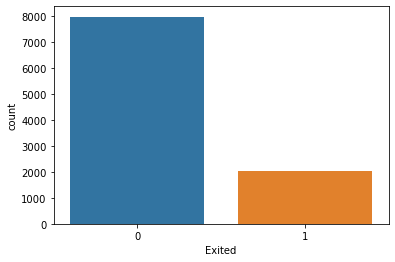

In [13]:
sns.countplot(x=y)

In [15]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
x_scaled=scaler.fit_transform(x)

In [19]:
x_scaled.shape

(10000, 8)

In [20]:
y.shape

(10000,)

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),activation='relu',max_iter=100,random_state=0)

In [30]:
clf=ann.fit(x_train,y_train)

C:\Users\SHASHANK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
y_pred=clf.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
8764    0
4359    0
2041    0
1108    0
3332    0
Name: Exited, Length: 2500, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score,classification_report

In [36]:
accuracy_score(y_test,y_pred)*100

82.28

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

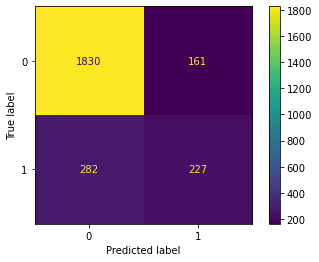

In [39]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [40]:
!pip install imbalanced-learn

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
ros=RandomOverSampler(random_state=0)

In [43]:
x_res,y_res=ros.fit_resample(x,y)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
x_scaled=scaler.fit_transform(x_res)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,test_size=0.25,random_state=0)

In [48]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,random_state=0,activation='relu')

In [49]:
clf2=ann.fit(x_train,y_train)

C:\Users\SHASHANK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
y_pred=clf2.predict(x_test)

In [51]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
y_test

10878    1
13564    1
3959     1
12402    1
14151    1
        ..
12022    1
6277     0
11714    1
10255    1
13376    1
Name: Exited, Length: 3982, dtype: int64

In [53]:
accuracy_score(y_test,y_pred)

0.865143144148669

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982



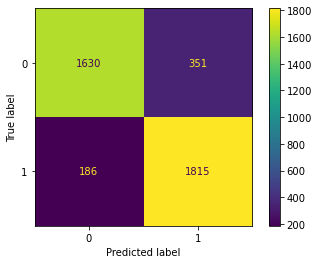

In [55]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()